In [ ]:
import numpy as np
import requests
import csv
from matplotlib import pyplot as plt

In [ ]:
train_url = 'https://drive.google.com/uc?id=1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF'
test_url = 'https://drive.google.com/uc?id=1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK'

train = requests.get(train_url).text
test = requests.get(test_url).text

def text_to_matrix(text):
  result =[]
  for line in text.splitlines()[1:]:
    s = line.split(",")
    result.append((s[1], s[2]))
  matr = np.array(result)
  matr = matr.astype(float)
  return matr

train = text_to_matrix(train)
test = text_to_matrix(test)
print('train:')
print(train.shape)
print(train[:10])

print('test:')
print(test.shape)
print(test[:10])

train:
(60, 2)
[[0.00000000e+00 2.01490142e+01]
 [1.01010101e-02 1.99787227e+01]
 [2.02020202e-02 2.02347106e+01]
 [3.03030303e-02 2.05175150e+01]
 [4.04040404e-02 2.00105621e+01]
 [5.05050505e-02 2.00307690e+01]
 [6.06060606e-02 2.05949760e+01]
 [7.07070707e-02 2.03716446e+01]
 [8.08080808e-02 2.00207738e+01]
 [9.09090909e-02 2.03445862e+01]]
test:
(40, 2)
[[ 0.60606061 21.06836894]
 [ 0.61616162 21.17662554]
 [ 0.62626263 20.92062476]
 [ 0.63636364 20.91386529]
 [ 0.64646465 21.53668704]
 [ 0.65656566 21.72000332]
 [ 0.66666667 21.3117303 ]
 [ 0.67676768 21.65459522]
 [ 0.68686869 21.48222818]
 [ 0.6969697  21.20040347]]


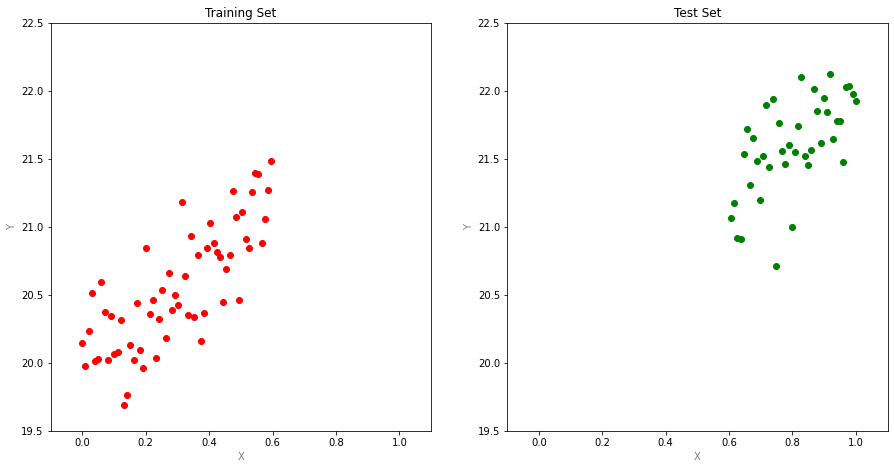

In [ ]:
def create_plot(data, index, name, param):
  data_set = data
  plt.subplot(1, 2, index)
  plt.xlabel('X', color='gray')
  plt.ylabel('Y', color='gray')
  plt.axis([-0.1, 1.1, 19.5, 22.5])
  plt.title(name)
  plt.plot(data_set[:,0], data_set[:,1], param)

fig = plt.gcf()
fig.set_size_inches(15, 7.5)

create_plot(train, 1, 'Training Set', 'ro')
create_plot(test, 2, 'Test Set', 'go')

plt.show()

In [ ]:
class Regression():
    def __init__(self, learning_rate=0.1, tol=0.000001, seed=None):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn()
        self.b = 0

    def __computeCost(self,h,Y):
        loss = np.square(Y-h)
        cost = np.sum(loss)/(self.__m)
        return cost

    def __optimize(self,X,Y):
        h = self.predict(X)
        dW = -2*np.sum(X*(Y-h)) / self.__m
        db = -2*np.sum( Y-h )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def fit(self, X, y, verbose=False):
        self.__m = y.shape[0]
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = self.predict(X)
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if abs(last_cost-cost) < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):
        return X*self.W+self.b

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
      return self.__computeCost(self.predict(X),y)



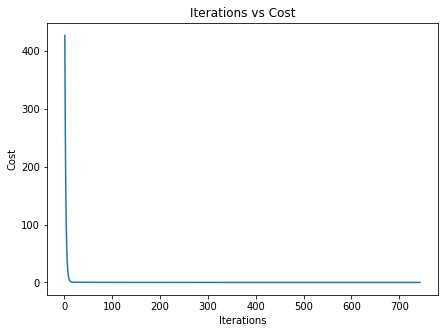

In [ ]:
model = Regression()
model.fit(train[:,0], train[:,1])
model.plot()

In [ ]:
model.score(train[:,0], train[:,1])

0.07312198247564743

In [ ]:
model.score(test[:,0], test[:,1])

0.04926821054964037

2.032015103143062 19.943606167975425


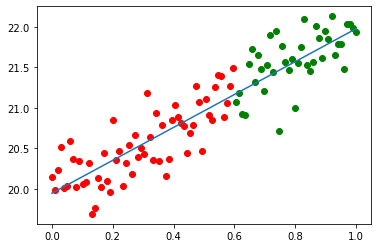

In [ ]:
x = np.linspace(0, 1, 2)
y = model.W*x+model.b
print(model.W,model.b)

plt.plot(train[:,0], train[:,1],'ro')
plt.plot(test[:,0], test[:,1],'go')
plt.plot(x,y)